In [2]:
import numpy as np 
import cv2
import dlib
from scipy.spatial import distance
import os
from imutils import face_utils

In [3]:
pwd = os.getcwd()# 获取当前路径
model_path = os.path.join(pwd, 'model')# 模型文件夹路径
shape_detector_path = os.path.join(model_path, 'shape_predictor_68_face_landmarks.dat')# 人脸特征点检测模型路径

detector = dlib.get_frontal_face_detector()# 人脸检测器
predictor = dlib.shape_predictor(shape_detector_path)# 人脸特征点检测器

In [40]:
EYE_AR_THRESH = 0.20    # EAR阈值
EYE_AR_CONSEC_FRAMES = 3    # 当EAR小于阈值时，接连多少帧一定发生眨眼动作

# 对应特征点的序号
RIGHT_EYE_START = 37 - 1
RIGHT_EYE_END = 42 - 1
LEFT_EYE_START = 43 - 1
LEFT_EYE_END = 48 - 1

In [9]:
def dist(p1, p2):
    return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def eye_aspect_ratio(eye):
    return (dist(eye[1], eye[5]) + dist(eye[2], eye[4]))/(2*dist(eye[0],eye[3]))
    

In [42]:
k = 1
EAR = []

frame_counter = 0# 连续帧计数 
blink_counter = 0# 眨眼计数
cap = cv2.VideoCapture(0)
'''
if __name__ == '__main__':
    cv2.namedWindow("image", cv2.WINDOW_AUTOSIZE)
    cv2.setMouseCallback("image", onMouseClicked)
'''
while(1):
    ret, img = cap.read()# 读取视频流的一帧

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)# 转成灰度图像
    rects = detector(gray, 0)# 人脸检测
    
    
            
    for rect in rects:# 遍历每一个人脸
        print('-'*20)
        shape = predictor(gray, rect)# 检测特征点
        points = face_utils.shape_to_np(shape)# convert the facial landmark (x, y)-coordinates to a NumPy array
        leftEye = points[LEFT_EYE_START:LEFT_EYE_END + 1]# 取出左眼对应的特征点
        rightEye = points[RIGHT_EYE_START:RIGHT_EYE_END + 1]# 取出右眼对应的特征点
        leftEAR = eye_aspect_ratio(leftEye)# 计算左眼EAR
        rightEAR = eye_aspect_ratio(rightEye)# 计算右眼EAR
        print('leftEAR = {0}'.format(leftEAR))
        print('rightEAR = {0}'.format(rightEAR))

        ear = (leftEAR + rightEAR) / 2.0# 求左右眼EAR的均值

        leftEyeHull = cv2.convexHull(leftEye)# 寻找左眼轮廓
        rightEyeHull = cv2.convexHull(rightEye)# 寻找右眼轮廓
        cv2.drawContours(img, [leftEyeHull], -1, (255, 0, 0), 1)# 绘制左眼轮廓
        cv2.drawContours(img, [rightEyeHull], -1, (255, 0, 0), 1)# 绘制右眼轮廓

        # 如果EAR小于阈值，开始计算连续帧，只有连续帧计数超过EYE_AR_CONSEC_FRAMES时，才会计做一次眨眼
        if ear < EYE_AR_THRESH:
            frame_counter += 1
        else:
            if frame_counter >= EYE_AR_CONSEC_FRAMES:
                blink_counter += 1
            frame_counter = 0

        # 在图像上显示出眨眼次数blink_counter和EAR
        cv2.putText(img, "Blinks:{0}".format(blink_counter), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(img, "EAR:{:.2f}".format(ear), (300, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        k += 1
        EAR.append(ear)


    cv2.imshow("Frame", img)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

--------------------
leftEAR = 0.24981529365782856
rightEAR = 0.2510375017799535
--------------------
leftEAR = 0.20782718421293614
rightEAR = 0.2004318881415724
--------------------
leftEAR = 0.28313146761731683
rightEAR = 0.26331215741863173
--------------------
leftEAR = 0.21373146245564592
rightEAR = 0.18996170757923905
--------------------
leftEAR = 0.19487284420450357
rightEAR = 0.18849572809956905
--------------------
leftEAR = 0.24547061619558583
rightEAR = 0.22631943454558298
--------------------
leftEAR = 0.2399520143952017
rightEAR = 0.22753597247178223
--------------------
leftEAR = 0.18269230769230768
rightEAR = 0.1818615291973998
--------------------
leftEAR = 0.21149935654477528
rightEAR = 0.19665451890570085
--------------------
leftEAR = 0.22142629345997347
rightEAR = 0.21255156383573762
--------------------
leftEAR = 0.20739955445138614
rightEAR = 0.2
--------------------
leftEAR = 0.24069947207827233
rightEAR = 0.2132642354938558
--------------------
leftEAR = 0.2501

--------------------
leftEAR = 0.22641509433962265
rightEAR = 0.2223645650651443
--------------------
leftEAR = 0.21568627450980393
rightEAR = 0.1988363825074164
--------------------
leftEAR = 0.26410393726659076
rightEAR = 0.23561275444037588
--------------------
leftEAR = 0.18627450980392157
rightEAR = 0.18059938372770792
--------------------
leftEAR = 0.22111296366044686
rightEAR = 0.23395091797016998
--------------------
leftEAR = 0.24920381963403124
rightEAR = 0.24918017437388354
--------------------
leftEAR = 0.19574007317156783
rightEAR = 0.19132557316162815
--------------------
leftEAR = 0.24996641046740042
rightEAR = 0.2579505021093418
--------------------
leftEAR = 0.24511829845638056
rightEAR = 0.2461076275199159
--------------------
leftEAR = 0.23524889921334693
rightEAR = 0.229766109656575
--------------------
leftEAR = 0.2220699630592816
rightEAR = 0.2085933253948616
--------------------
leftEAR = 0.24560161537747768
rightEAR = 0.23697500048023232
--------------------
lef

190
blink count: 3


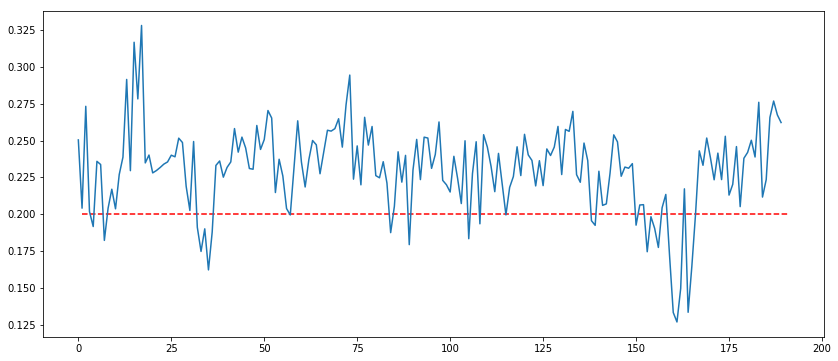

In [43]:
import matplotlib.pyplot as plt
print(len(EAR))
print("blink count:", blink_counter)
plt.figure(figsize=(14,6))
plt.plot(EAR)
plt.hlines(EYE_AR_THRESH, 1, k, linestyles='--', colors='r')
plt.show()

In [21]:
blink_counter

3

In [32]:
eye_aspect_ratio(rightEye)

0.17584685749664403